In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_80.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_930.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_369.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_39.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_717.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_622.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_343.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_891.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_734.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_738.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_149.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_526.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_404.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_111.png
/kaggle/input/mridataset/cleaned/Training/Pituitary/image1_47.pn

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import RandomRotation, RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import applications
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory

In [18]:
train_dir = '/kaggle/input/mridataset/cleaned/Training/'
test_dir = '/kaggle/input/mridataset/cleaned/Testing/'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

In [19]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+label):
        test_paths.append(test_dir+label+'/'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

# Visualizing class distribution

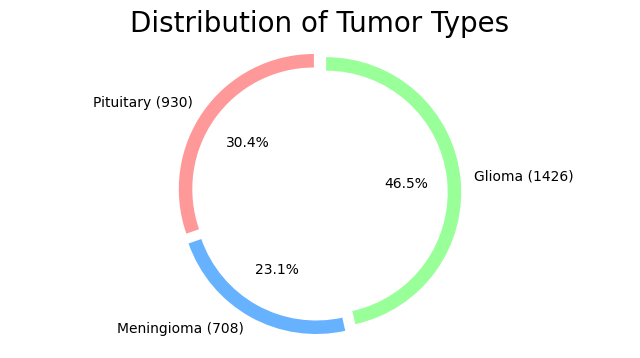

<Figure size 640x480 with 0 Axes>

In [20]:
# Combine train and test labels
all_labels = train_labels + test_labels

# Data
labels = ['Pituitary', 'Meningioma', 'Glioma']
total_sizes = [
    len([x for x in all_labels if x == 'Pituitary']),
    len([x for x in all_labels if x == 'Meningioma']),
    len([x for x in all_labels if x == 'Glioma'])
]

# Custom color palette for a brain tumor vibe
colors = ['#FF9999', '#66B2FF', '#99FF99']
explode = (0.05, 0.05, 0.05)

# Plotting
plt.figure(figsize=(8, 4))
plt.pie(total_sizes, labels=['{} ({})'.format(label, size) for label, size in zip(labels, total_sizes)], colors=colors, autopct='%1.1f%%', explode=explode, startangle=90, wedgeprops=dict(width=0.1))

# Title
plt.title('Distribution of Tumor Types', fontsize=20)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()
plt.savefig('DistOfTumorTypes.png')

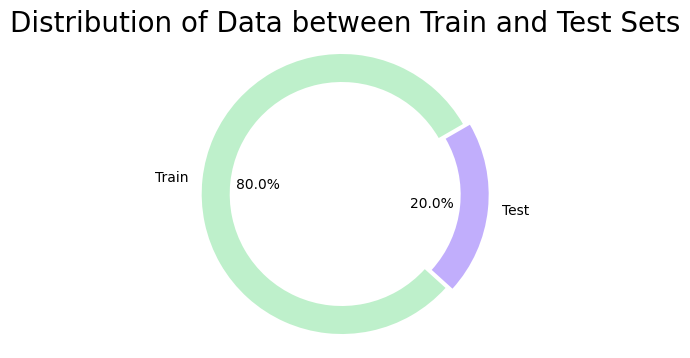

<Figure size 640x480 with 0 Axes>

In [21]:
# Data
labels = ['Train', 'Test']
sizes = [len(train_labels), len(test_labels)]
colors = ['#BEF0CB', '#C1AEFC']
explode = (0.05, 0)

# Plotting
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', explode=explode, startangle=30, wedgeprops=dict(width=0.2))

# Title
plt.title('Distribution of Data between Train and Test Sets', fontsize=20)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()
plt.savefig('/kaggle/working/Length of Train and Test Dataframes1.png')

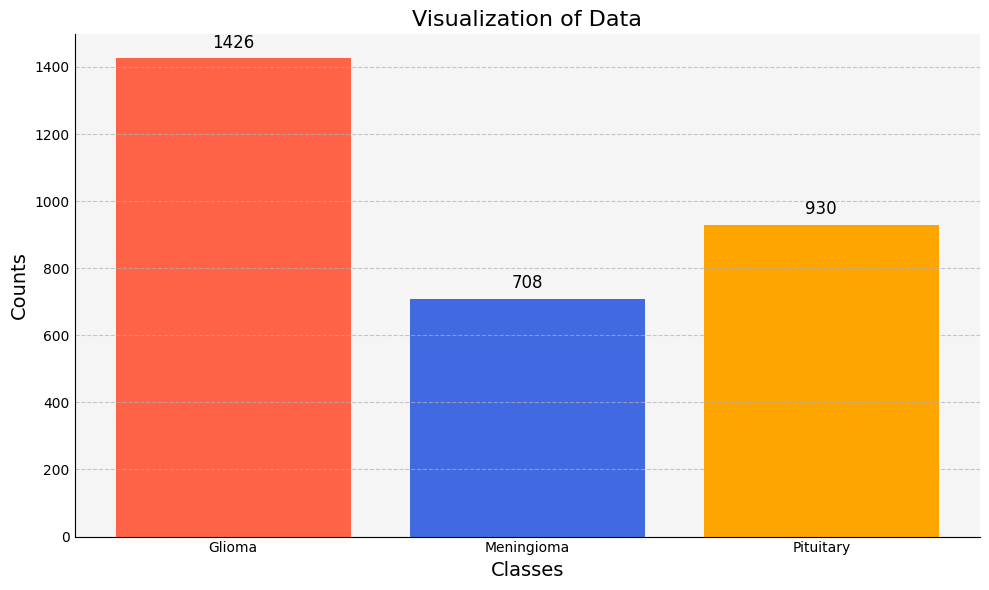

<Figure size 640x480 with 0 Axes>

In [22]:
# Data
classes = ['Glioma','Meningioma','Pituitary']
counts = [1426,708,930]
colors = ['#FF6347', '#4169E1', '#FFA500']

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjusting figure size
bars = plt.bar(classes, counts, color=colors)

# Adding labels and title
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Visualization of Data', fontsize=16)

# Setting background color
plt.gca().set_facecolor('#F5F5F5')

# Adding data labels
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20, count,
             ha='center', va='bottom', fontsize=12, color='black')

# Customizing gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjusting tick parameters
plt.tick_params(axis='both', which='both', length=0)

# Show plot
plt.tight_layout()
plt.show()
plt.savefig('/kaggle/working/Visualization of Data.png')

In [23]:
model_names = ['CNN', 'Federated Learning', 'VGG19', 'DenseNet201', 'MobileNetV2', 'InceptionResNetV2']

test_loss = [0.15363341569900513, 0.2053, 0.2555713355541229, 0.22146911919116974, 0.33546966314315796, 0.31166914105415344]

test_accuracy = [0.9527687430381775, 0.9560, 0.895765483379364, 0.9218240976333618, 0.8827361464500427, 0.8745928406715393]

test_auc = [0.9924721121788025, 0.9890, 0.9811291098594666, 0.985532283782959, 0.9729599356651306, 0.973535418510437]

test_precision = [0.9526916742324829, 0.9560, 0.9016666412353516, 0.9261083602905273, 0.887417197227478, 0.8857142925262451]

test_recall = [0.9511400461196899, 0.9560, 0.8811075091362, 0.9185667634010315, 0.8729641437530518, 0.8583061695098877]


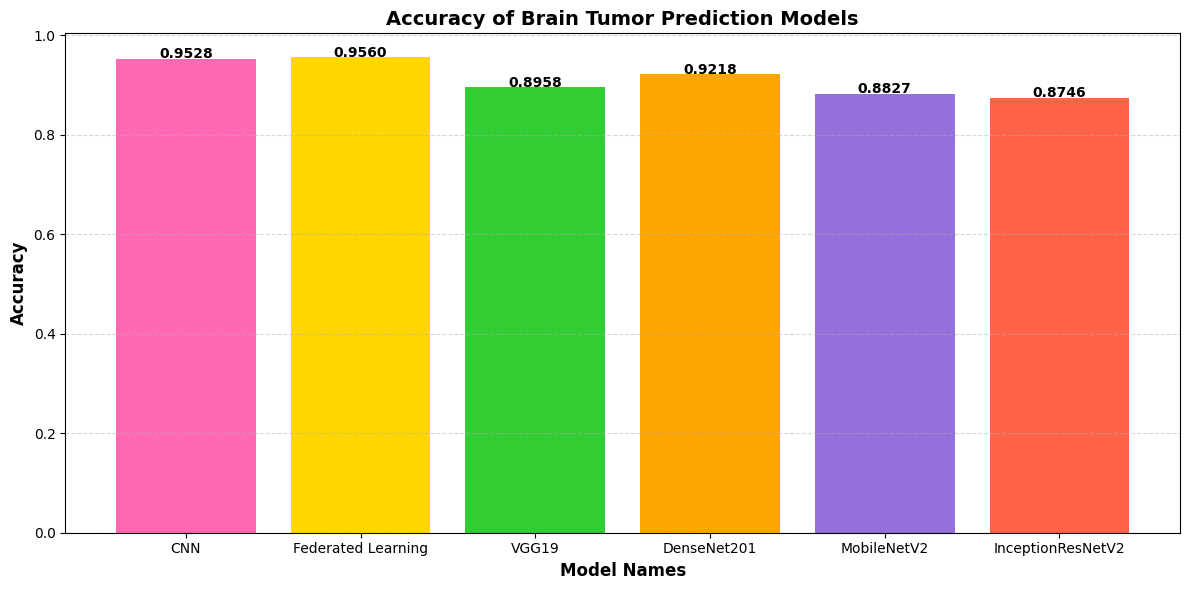

In [24]:
# Define data
colors = ['#FF69B4', '#4169E1', '#32CD32', '#FFA500', '#9370DB', '#FF6347']

# Plotting
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12, 6))

# Bar plot for accuracy
bars = plt.bar(model_names, test_accuracy, color=colors)

# Add data labels
for bar, acc in zip(bars, test_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.005, f'{acc:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Highlight the best accuracy
max_acc = max(test_accuracy)
best_model = model_names[test_accuracy.index(max_acc)]
plt.bar(best_model, max_acc, color='gold')

# Adding labels and title
plt.xlabel('Model Names', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Accuracy of Brain Tumor Prediction Models', fontsize=14, fontweight='bold')

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)


# Display the plot
plt.tight_layout()
plt.savefig('test_accuracy_plot.png')
plt.show()


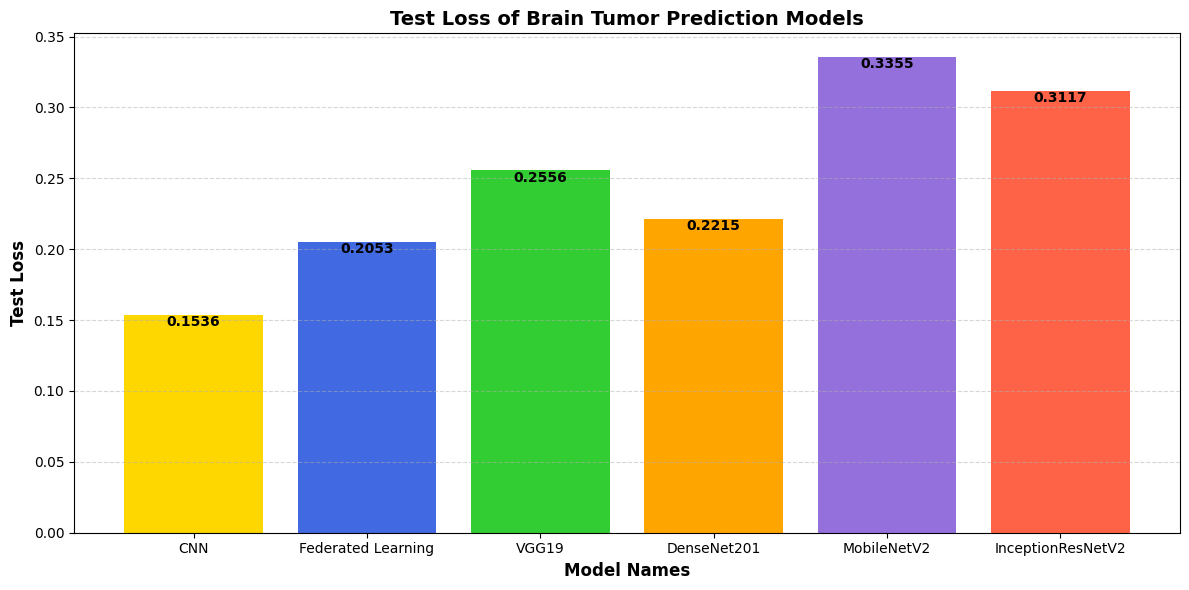

In [25]:
# Define data
colors = ['#FF69B4', '#4169E1', '#32CD32', '#FFA500', '#9370DB', '#FF6347']

# Plotting
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12, 6))

# Bar plot for test loss
bars = plt.bar(model_names, test_loss, color=colors)

# Add data labels
for bar, loss in zip(bars, test_loss):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01, f'{loss:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Highlight the lowest loss
min_loss = min(test_loss)
best_model = model_names[test_loss.index(min_loss)]
plt.bar(best_model, min_loss, color='gold')

# Adding labels and title
plt.xlabel('Model Names', fontsize=12, fontweight='bold')
plt.ylabel('Test Loss', fontsize=12, fontweight='bold')
plt.title('Test Loss of Brain Tumor Prediction Models', fontsize=14, fontweight='bold')

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.savefig('test_loss_plot.png')
plt.show()


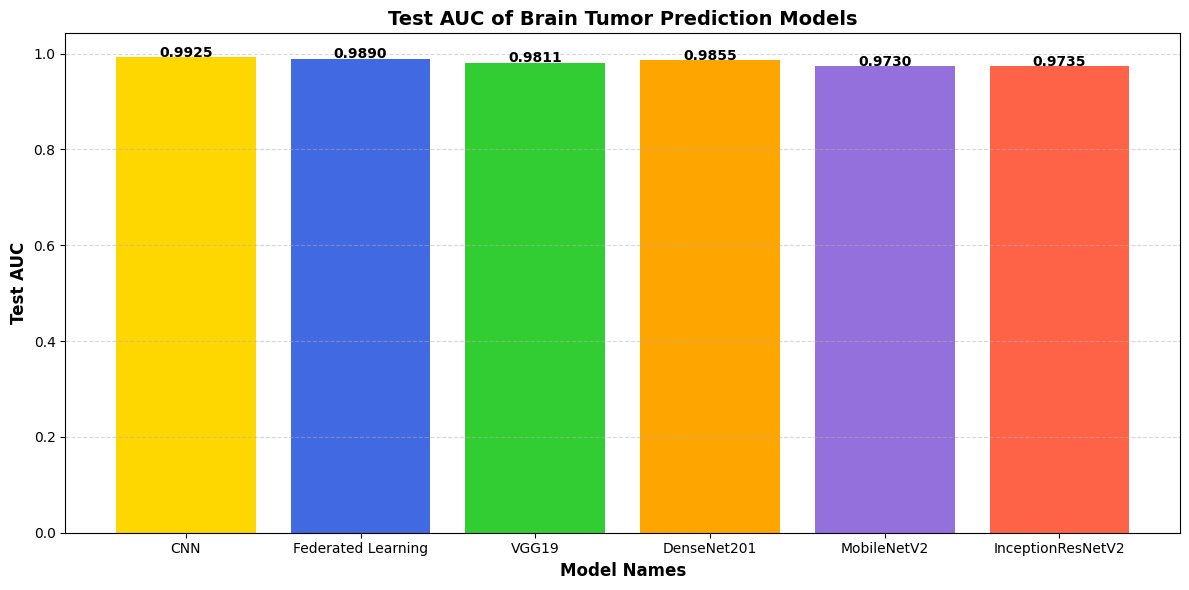

In [26]:
# Define data
colors = ['#FF69B4', '#4169E1', '#32CD32', '#FFA500', '#9370DB', '#FF6347']

# Plotting
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12, 6))

# Bar plot for test AUC
bars = plt.bar(model_names, test_auc, color=colors)

# Add data labels
for bar, auc in zip(bars, test_auc):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.005, f'{auc:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Highlight the highest AUC
max_auc = max(test_auc)
best_model = model_names[test_auc.index(max_auc)]
plt.bar(best_model, max_auc, color='gold')

# Adding labels and title
plt.xlabel('Model Names', fontsize=12, fontweight='bold')
plt.ylabel('Test AUC', fontsize=12, fontweight='bold')
plt.title('Test AUC of Brain Tumor Prediction Models', fontsize=14, fontweight='bold')

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.savefig('test_auc_plot.png')
plt.show()


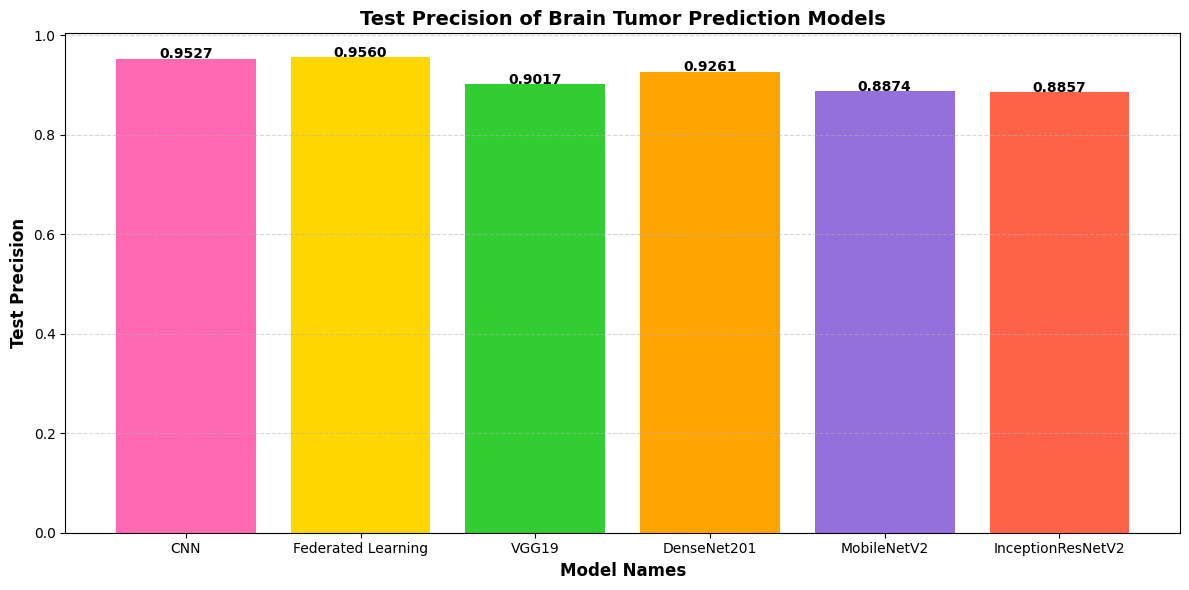

In [27]:
# Define data
colors = ['#FF69B4', '#4169E1', '#32CD32', '#FFA500', '#9370DB', '#FF6347']

# Plotting
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12, 6))

# Bar plot for test precision
bars = plt.bar(model_names, test_precision, color=colors)

# Add data labels
for bar, prec in zip(bars, test_precision):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.005, f'{prec:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Highlight the highest precision
max_precision = max(test_precision)
best_model = model_names[test_precision.index(max_precision)]
plt.bar(best_model, max_precision, color='gold')

# Adding labels and title
plt.xlabel('Model Names', fontsize=12, fontweight='bold')
plt.ylabel('Test Precision', fontsize=12, fontweight='bold')
plt.title('Test Precision of Brain Tumor Prediction Models', fontsize=14, fontweight='bold')

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.savefig('test_precision_plot.png')
plt.show()


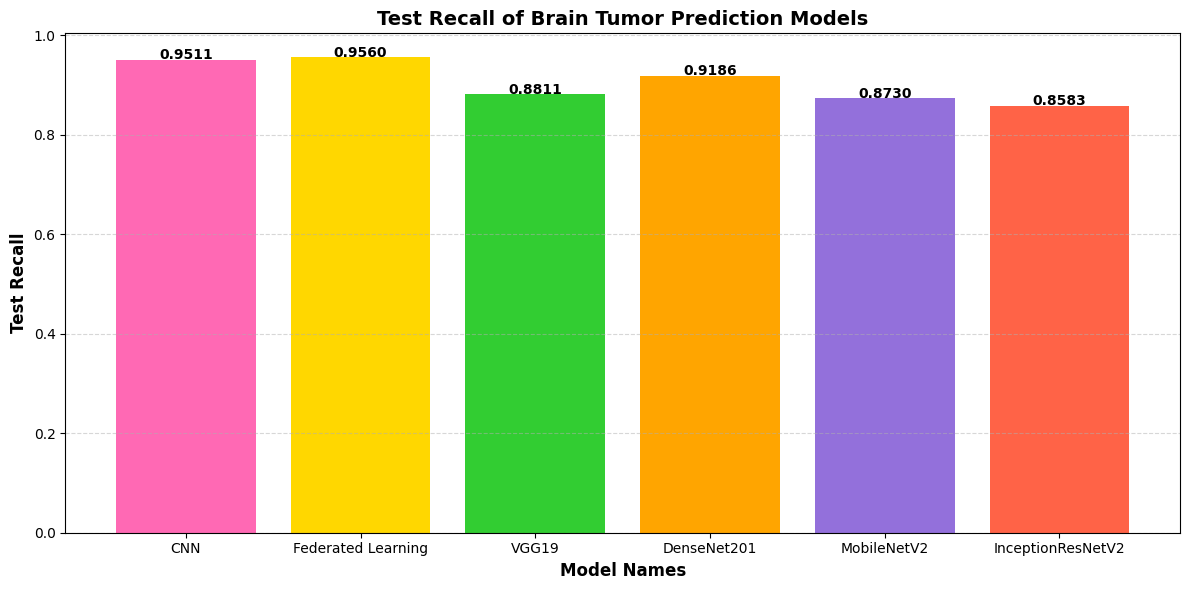

In [28]:
# Define data
test_recall = [0.9511400461196899, 0.9560, 0.8811075091362, 0.9185667634010315, 0.8729641437530518, 0.8583061695098877]
colors = ['#FF69B4', '#4169E1', '#32CD32', '#FFA500', '#9370DB', '#FF6347']

# Plotting
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12, 6))

# Bar plot for test recall
bars = plt.bar(model_names, test_recall, color=colors)

# Add data labels
for bar, recall in zip(bars, test_recall):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.005, f'{recall:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Highlight the highest recall
max_recall = max(test_recall)
best_model = model_names[test_recall.index(max_recall)]
plt.bar(best_model, max_recall, color='gold')

# Adding labels and title
plt.xlabel('Model Names', fontsize=12, fontweight='bold')
plt.ylabel('Test Recall', fontsize=12, fontweight='bold')
plt.title('Test Recall of Brain Tumor Prediction Models', fontsize=14, fontweight='bold')

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.savefig('test_recall_plot.png')
plt.show()


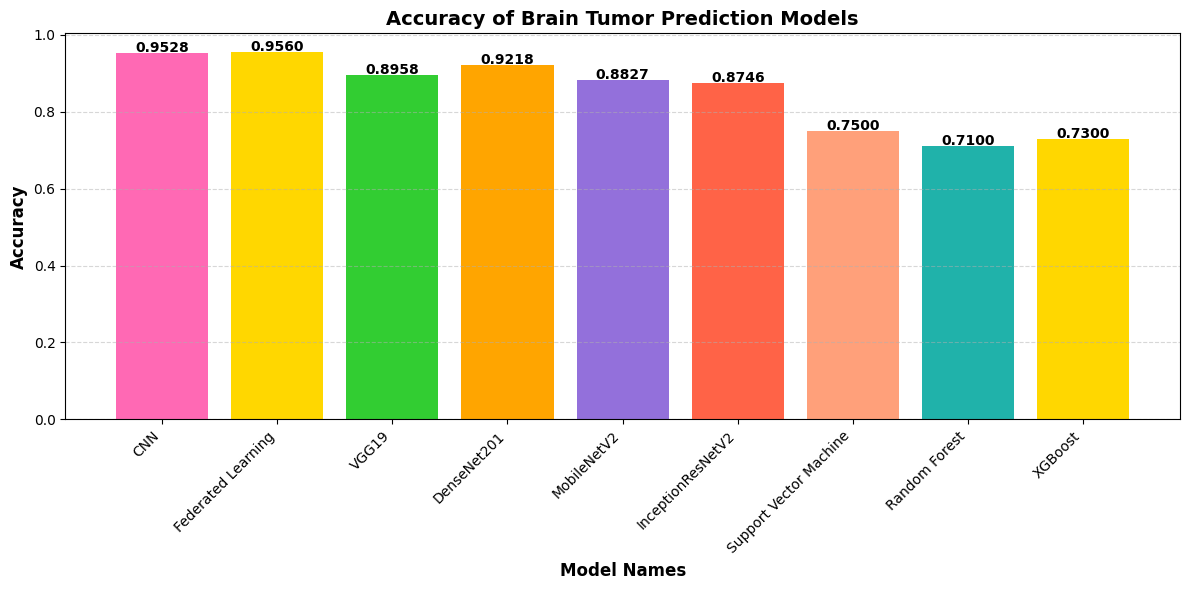

In [29]:
test_accuracy = [0.9527687430381775, 0.9560, 0.895765483379364, 0.9218240976333618, 0.8827361464500427, 0.8745928406715393, 0.75, 0.71, 0.73]
model_names = ['CNN', 'Federated Learning', 'VGG19', 'DenseNet201', 'MobileNetV2', 'InceptionResNetV2', 'Support Vector Machine', 'Random Forest', 'XGBoost']

# Define data
colors = ['#FF69B4', '#4169E1', '#32CD32', '#FFA500', '#9370DB', '#FF6347', '#FFA07A', '#20B2AA', '#FFD700']

# Plotting
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12, 6))

# Bar plot for accuracy
bars = plt.bar(model_names, test_accuracy, color=colors)

# Add data labels
for bar, acc in zip(bars, test_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.005, f'{acc:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Highlight the best accuracy
max_acc = max(test_accuracy)
best_model = model_names[test_accuracy.index(max_acc)]
plt.bar(best_model, max_acc, color='gold')

# Adding labels and title
plt.xlabel('Model Names', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Accuracy of Brain Tumor Prediction Models', fontsize=14, fontweight='bold')

# Rotate x-axis labels to avoid collision
plt.xticks(rotation=45, ha='right')

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Save and display the plot
plt.tight_layout()
plt.savefig('test_accuracy_plot.png')
plt.show()
